# 전략
* shallow FE 로 피쳐변환한 데이터로 모델링
* deeper FE와 RMSE 비교
* 모델링을 해서 중요한 변수가 뭔지 파악
* SHAP으로 전체 변수 관계 파악

# Load module

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_val_predict
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import joblib
import math
import os
print(os.listdir("../../../data/house"))

['ames_shallow_fe.pickle', 'ames.pickle', 'descriptions.pickle', 'ames.csv', 'description.txt']


# Load data

In [3]:
filename = '../../../data/house/ames_shallow_fe.pickle'
df = joblib.load(filename)
df.head(3)

p_i_d  area   price m_s_sub_class  m_s_zoning  lot_frontage  lot_area  \
0  526350040   896  105000            20           0          80.0     11622   
1  526351010  1329  172000            20           1          81.0     14267   
2  526353030  2110  244000            20           1          93.0     11160   

   lot_shape  land_contour  lot_config  ...  pool_area  fence  misc_feature  \
0          0             0           0  ...          0      0             0   
1          1             0           1  ...          0      1             1   
2          0             0           1  ...          0      1             0   

   misc_val  mo_sold  yr_sold  sale_type  sale_condition  log_price  total_s_f  
0         0        6     2010          0               0  11.561725     1778.0  
1     12500        6     2010          0               0  12.055256     2658.0  
2         0        4     2010          0               0  12.404928     4220.0  

[3 rows x 79 columns]

In [4]:
total, colnum = df.shape
print('row cnt = {}, num of columns = {}'.format(total, colnum))

row cnt = 2888, num of columns = 79


# Modeling

In [6]:
from pycaret.regression import *
reg3 = setup(df, target = 'log_price', 
             session_id=123, 
             train_size=0.9,
             fold=2,
             log_experiment=True, 
             ignore_features=['p_i_d','price'],
             experiment_name='house3')

In [7]:
best = compare_models(include = ['catboost','lightgbm','xgboost','br','ridge'], fold=2, sort='RMSE')
# best = compare_models()

In [8]:
catboost = create_model('catboost')

In [9]:
import shap
explainer = shap.TreeExplainer(catboost)

In [10]:
get_config('X').head(5)

area  lot_frontage  lot_area  neighborhood  year_built  year_remod_add  \
0   896.0          80.0   11622.0           0.0      1961.0          1961.0   
1  1329.0          81.0   14267.0           0.0      1958.0          1958.0   
2  2110.0          93.0   11160.0           0.0      1968.0          1968.0   
3  1629.0          74.0   13830.0           1.0      1997.0          1998.0   
4  1604.0          78.0    9978.0           1.0      1998.0          1998.0   

   mas_vnr_area  bsmt_fin_s_f1  bsmt_fin_s_f2  bsmt_unf_s_f  ...  sale_type_6  \
0           0.0          468.0          144.0         270.0  ...          0.0   
1         108.0          923.0            0.0         406.0  ...          0.0   
2           0.0         1065.0            0.0        1045.0  ...          0.0   
3           0.0          791.0            0.0         137.0  ...          0.0   
4          20.0          602.0            0.0         324.0  ...          0.0   

   sale_type_7  sale_type_8  sale_type_9  sale_condition_0  sale_condition_1  \
0          0.0          0.0          0.0               1.0               0.0   
1          0.0          0.0          0.0               1.0               0.0   
2          0.0          0.0          0.0               1.0               0.0   
3          0.0          0.0          0.0               1.0               0.0   
4          0.0          0.0          0.0               1.0               0.0   

   sale_condition_2  sale_condition_3  sale_condition_4  sale_condition_5  
0               0.0               0.0               0.0               0.0  
1               0.0               0.0               0.0               0.0  
2               0.0               0.0               0.0               0.0  
3               0.0               0.0               0.0               0.0  
4               0.0               0.0               0.0               0.0  

[5 rows x 347 columns]

In [11]:
X = get_config('X')

In [12]:
shap_values = explainer.shap_values(X)

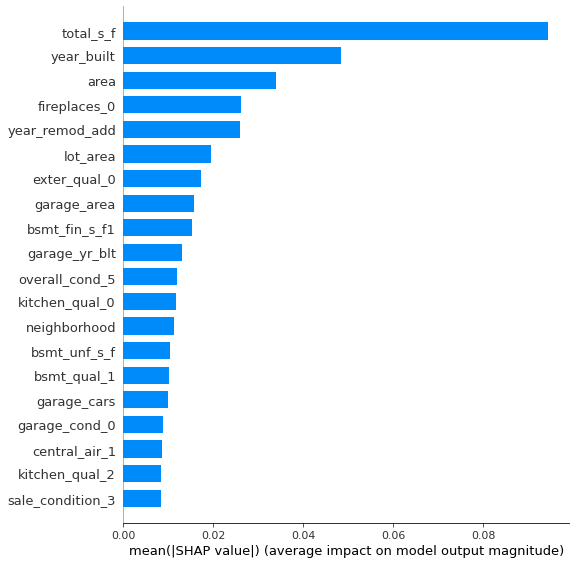

In [13]:
shap.summary_plot(shap_values,X,plot_type="bar",show=False)

In [14]:
np.expm1(0.1176)

0.12479410373032288

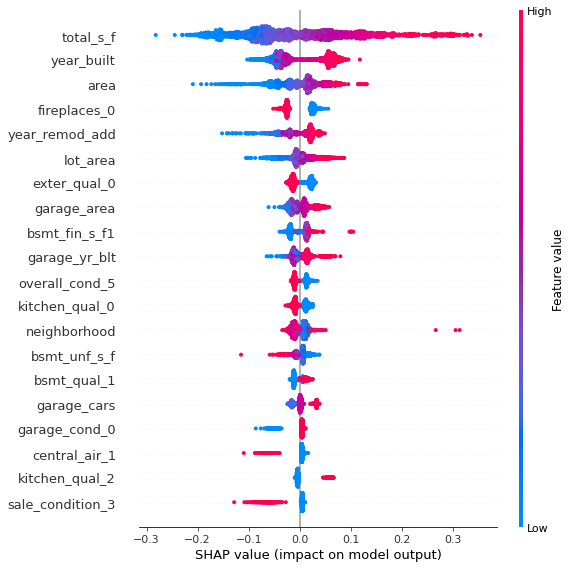

In [15]:
shap.summary_plot(shap_values,X,show=False)

In [16]:
expectation = explainer.expected_value

In [17]:
# house SalePrice의 평균은?
np.expm1(expectation)

165848.84340839807

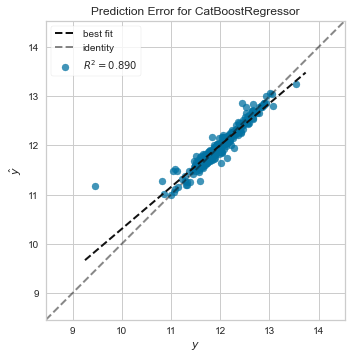

In [18]:
plot_model(catboost, 'error')

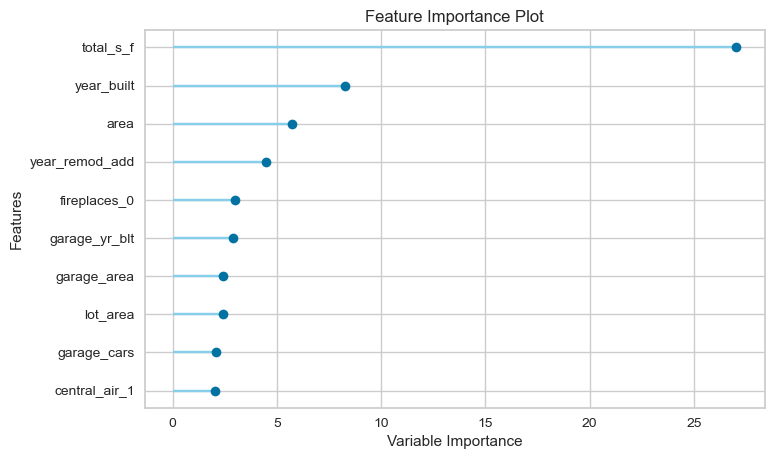

In [19]:
plot_model(catboost, 'feature')

In [20]:
plot_model(catboost, 'parameter')

Parameters
nan_mode                                           Min
eval_metric                                       RMSE
iterations                                        1000
sampling_frequency                             PerTree
leaf_estimation_method                          Newton
grow_policy                              SymmetricTree
penalties_coefficient                                1
boosting_type                                    Plain
model_shrink_mode                             Constant
feature_border_type                       GreedyLogSum
bayesian_matrix_reg                0.10000000149011612
l2_leaf_reg                                          3
random_strength                                      1
rsm                                                  1
boost_from_average                                True
model_size_reg                                     0.5
subsample                            0.800000011920929
use_best_model                                   False
random_seed                                        123
depth                                                6
posterior_sampling                               False
border_count                                       254
classes_count                                        0
auto_class_weights                                None
sparse_features_conflict_fraction                    0
leaf_estimation_backtracking            AnyImprovement
best_model_min_trees                                 1
model_shrink_rate                                    0
min_data_in_leaf                                     1
loss_function                                     RMSE
learning_rate                      0.04626300185918808
score_function                                  Cosine
task_type                                          CPU
leaf_estimation_iterations                           1
bootstrap_type                                     MVS
max_leaves                                          64

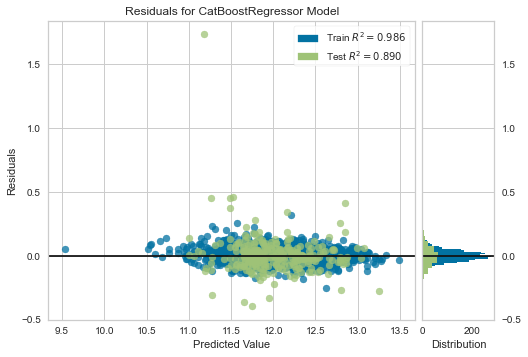

In [21]:
plot_model(catboost, 'residuals')

In [22]:
print('11-->{}'.format(np.expm1(11)))
print('12-->{}'.format(np.expm1(12)))
print('13-->{}'.format(np.expm1(13)))

11-->59873.14171519782
12-->162753.79141900392
13-->442412.3920089205


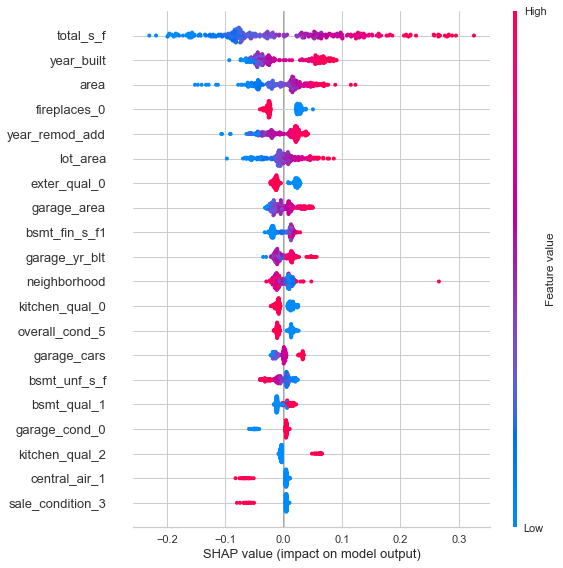

In [23]:
interpret_model(catboost)

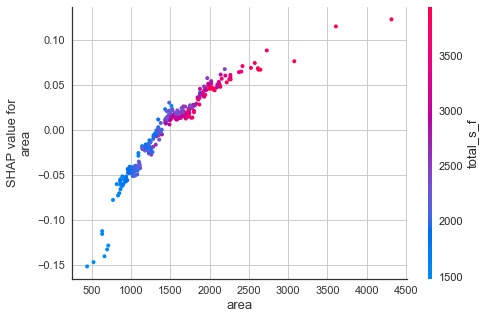

In [24]:
interpret_model(catboost, plot = 'correlation')

In [38]:
interpret_model(catboost, plot = 'reason', observation = 2)

In [26]:
np.expm1(11.78)

130612.77957221285

# Prediction

In [42]:
predictions = predict_model(catboost, data=df)

In [45]:
predictions['predicted_price'] = np.expm1(predictions['Label'])

In [48]:
predictions[['price','predicted_price','log_price','Label']].head(5)

price  predicted_price  log_price      Label
0  105000    117952.693080  11.561725  11.678047
1  172000    168945.919865  12.055256  12.037340
2  244000    255284.616078  12.404928  12.450138
3  189900    189061.216743  12.154258  12.149831
4  195500    203119.744858  12.183321  12.221556

In [50]:
rmse = ((predictions.price - predictions.predicted_price) ** 2).mean() ** .5
rmse

11137.080842440517

# Save model 

In [53]:
catboost

In [55]:
final_catboost = finalize_model(catboost)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [54]:
save_model(catboost, 'catboost')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['p_i_d', 'price'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='log_price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='log_price')),
                 ('fix_perfect', Remove_100(target='log_price')),
                 ('clean_names', Clean_Colum_Names()),
     